#                                Boston house price prediction

![](house.jpg)

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s boston dataset.

In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price).
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Initializing the dataframe
data = pd.DataFrame(boston.data)

# Data Manipulation

In [3]:
# Adding the feature names to the dataframe
data.columns = boston.feature_names
# See head of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM per capita crime rate by town <br>
ZN proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS proportion of non-retail business acres per town <br>
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
NOX nitric oxides concentration (parts per 10 million) <br>
RM average number of rooms per dwelling <br>
AGE proportion of owner-occupied units built prior to 1940 <br>
DIS weighted distances to five Boston employment centres <br>
RAD index of accessibility to radial highways <br>
TAX full-value property-tax rate per 10,000usd <br>
PTRATIO pupil-teacher ratio by town <br>
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT % lower status of the population <br>

Each record in the database describes a Boston suburb or town.

In [4]:
# Adding target variable to dataframe
data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [5]:
data['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

# Exploratory Data Analysis (EDA)

In [6]:
# Check the shape of dataframe
data.shape

(506, 14)

In [7]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [8]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [9]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [10]:
# Identifying categorical features (less than 10 unique values) 
cat_cols   = data.nunique()[data.nunique() < 10].keys().tolist()
print("Categorical features:",cat_cols)
# Identifying numeric features
nums_cols   = data.nunique()[data.nunique() >= 10].keys().tolist()
print("Numeric features:", nums_cols)

Categorical features: ['CHAS', 'RAD']
Numeric features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


In [11]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [13]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

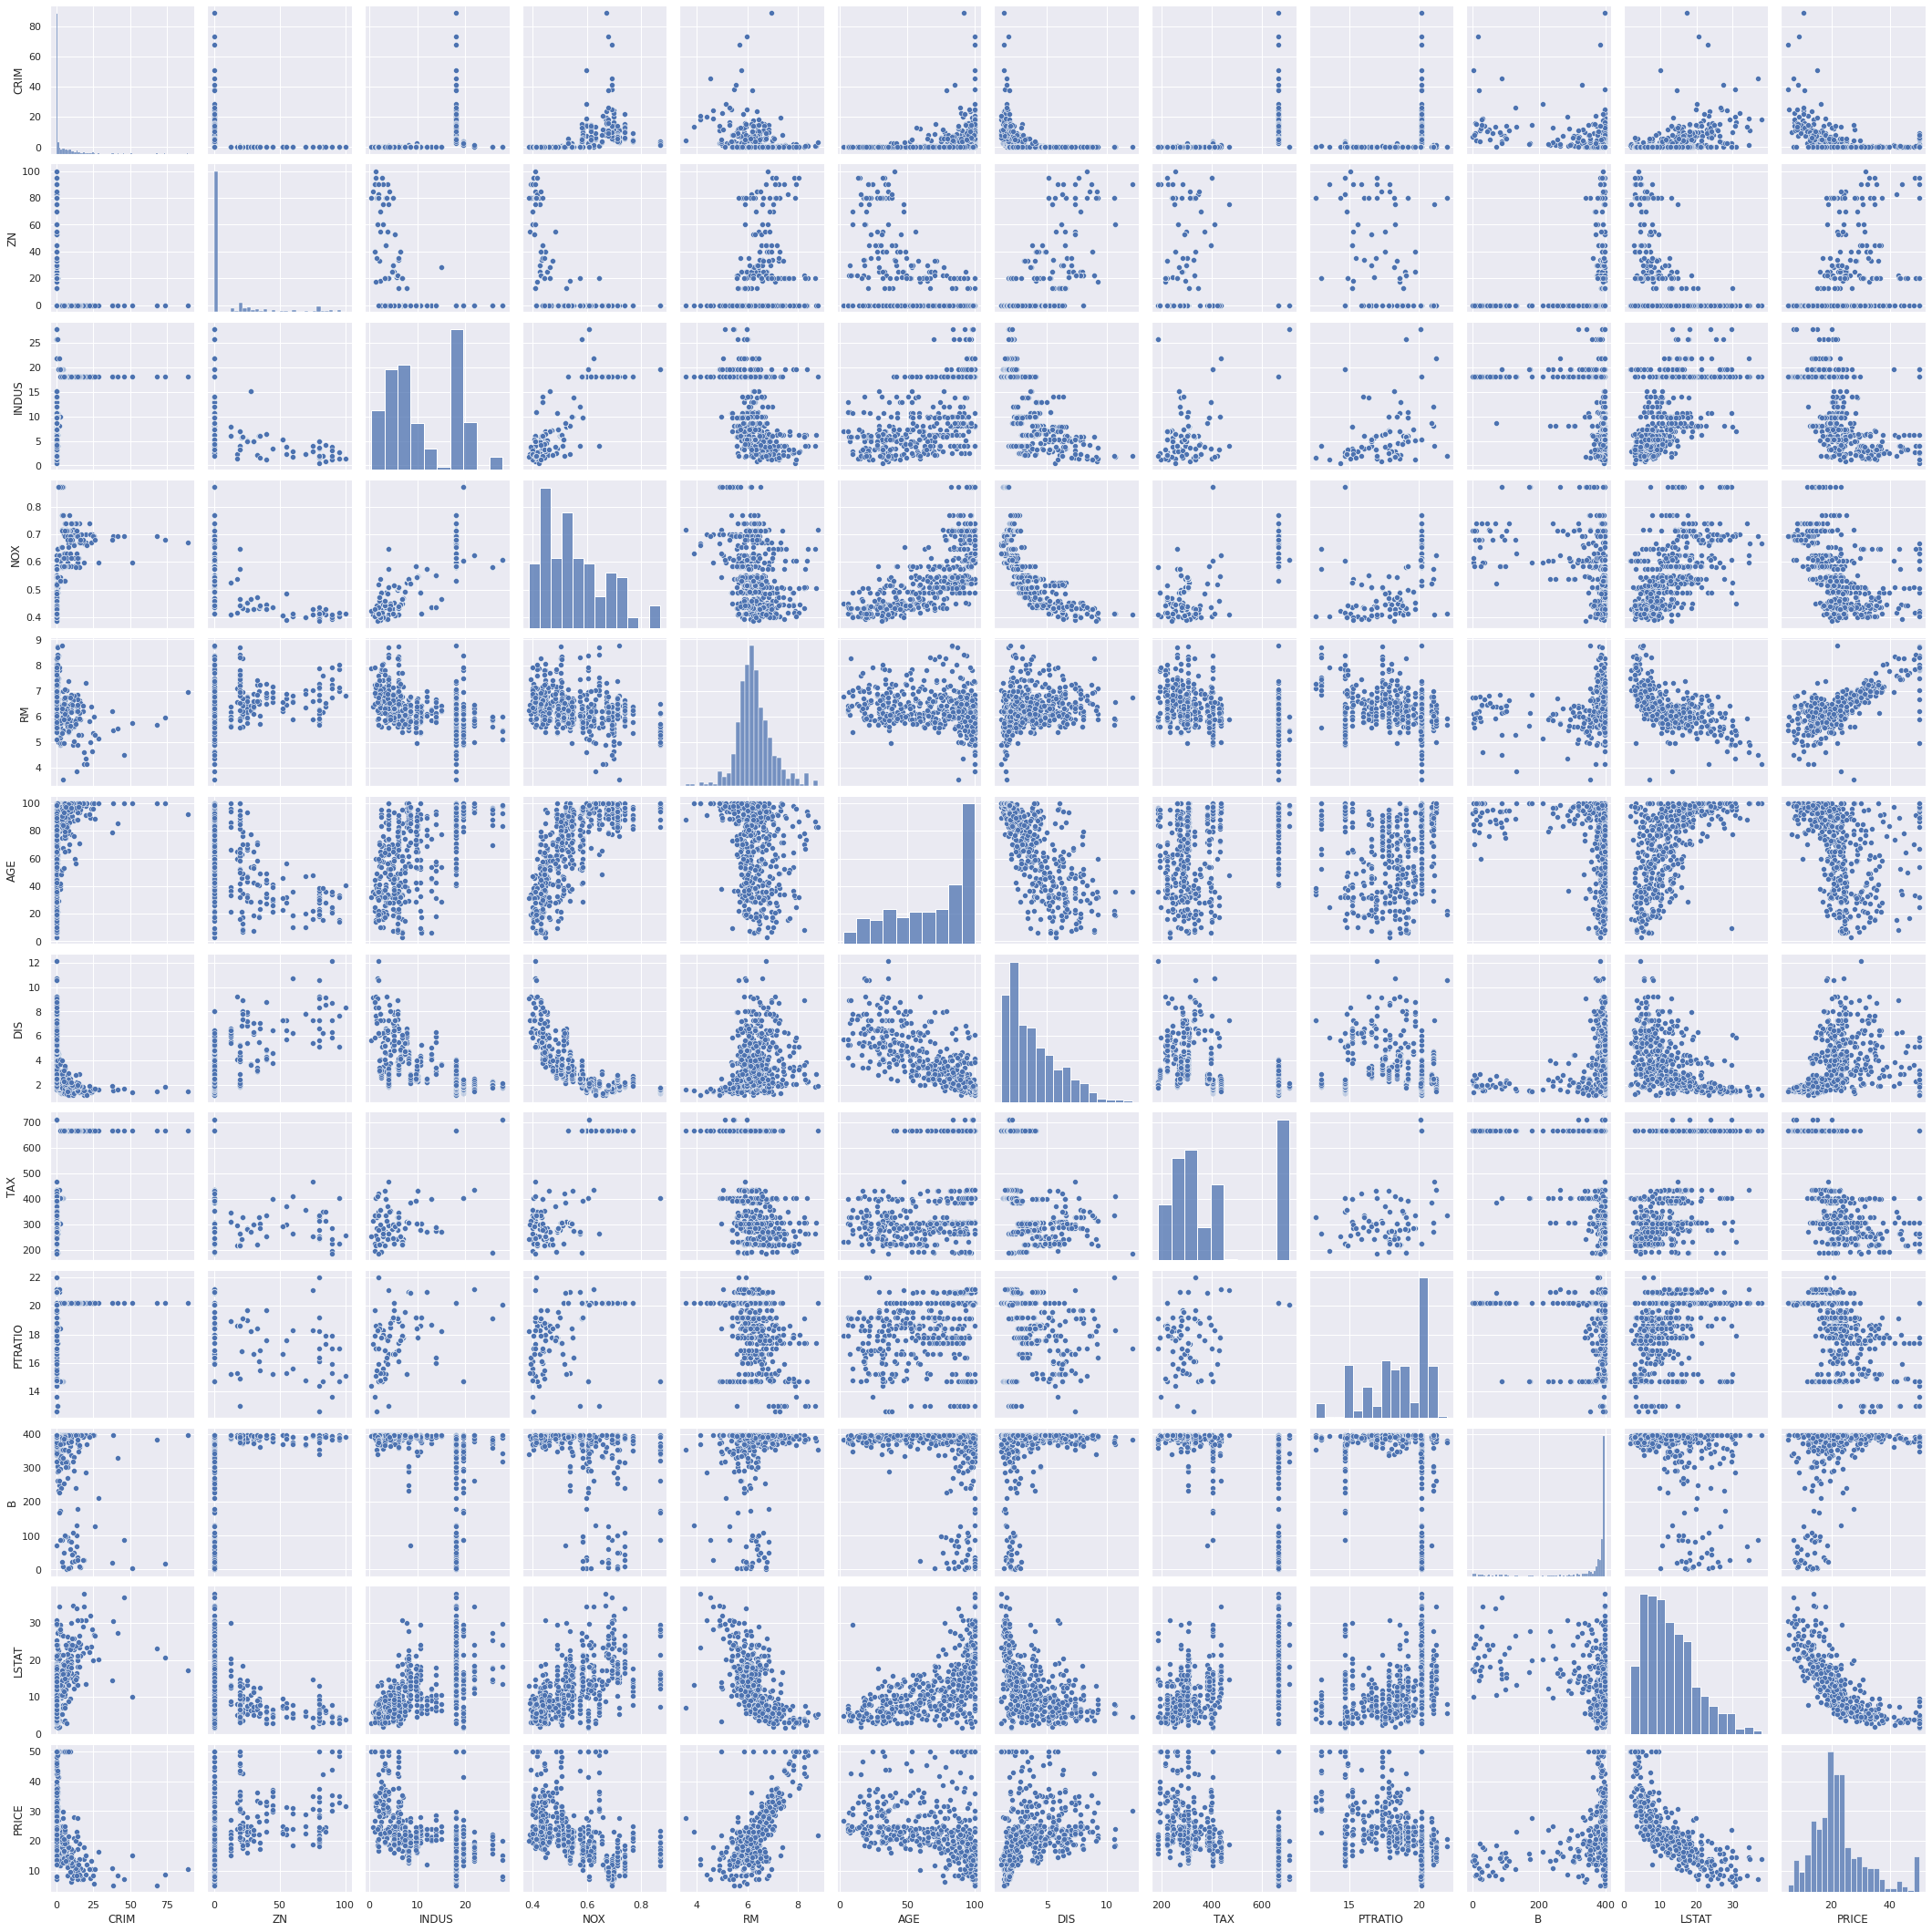

In [15]:
# Scatterplot for numeric features
sns.set()
sns.pairplot(data[nums_cols], size = 2.5)
plt.show();

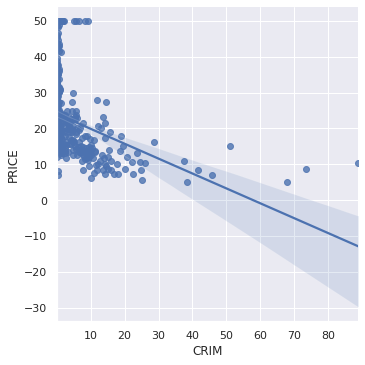

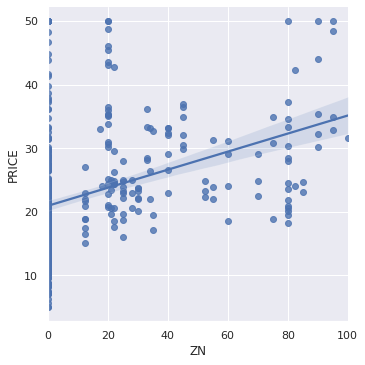

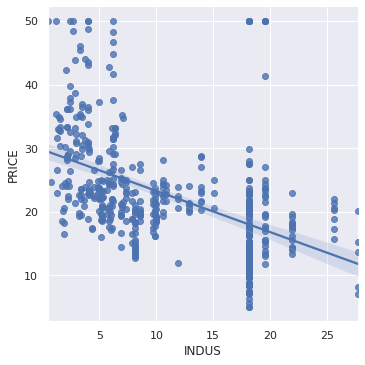

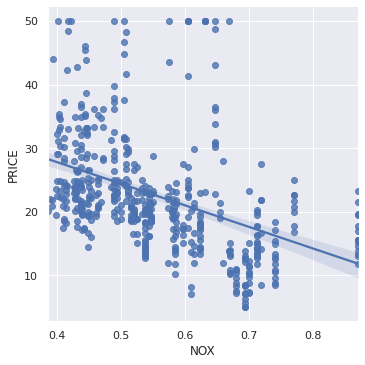

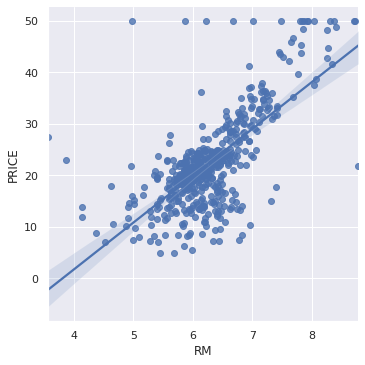

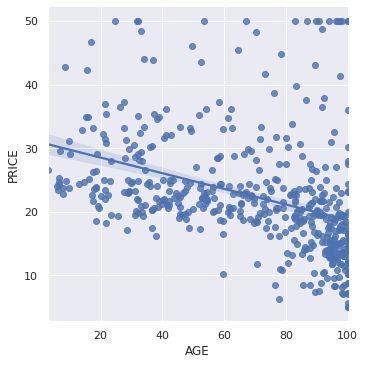

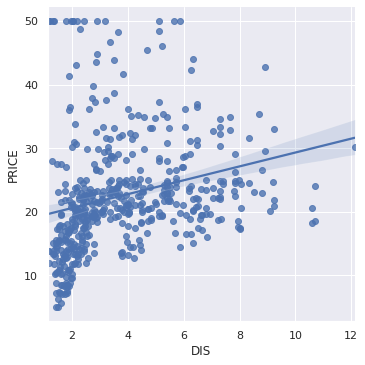

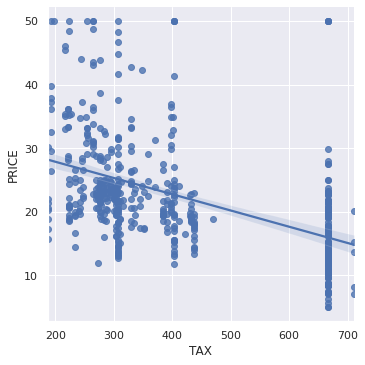

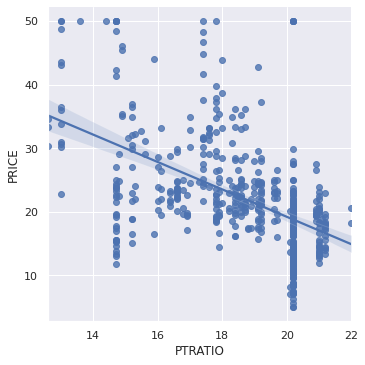

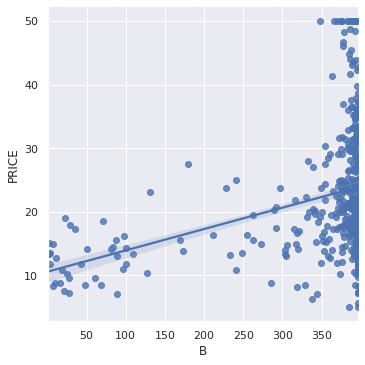

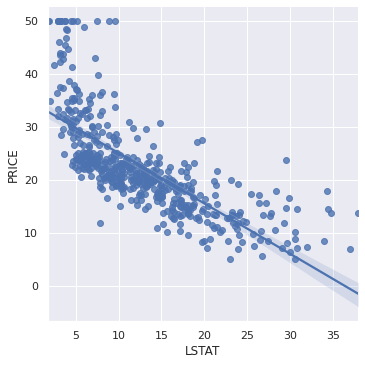

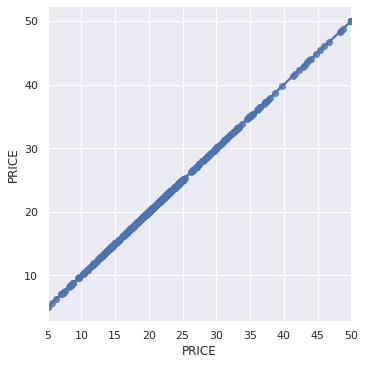

In [16]:
# Scatter Numeric features / price
for feature in nums_cols:
    sns.lmplot(x=feature, y='PRICE', data=data)

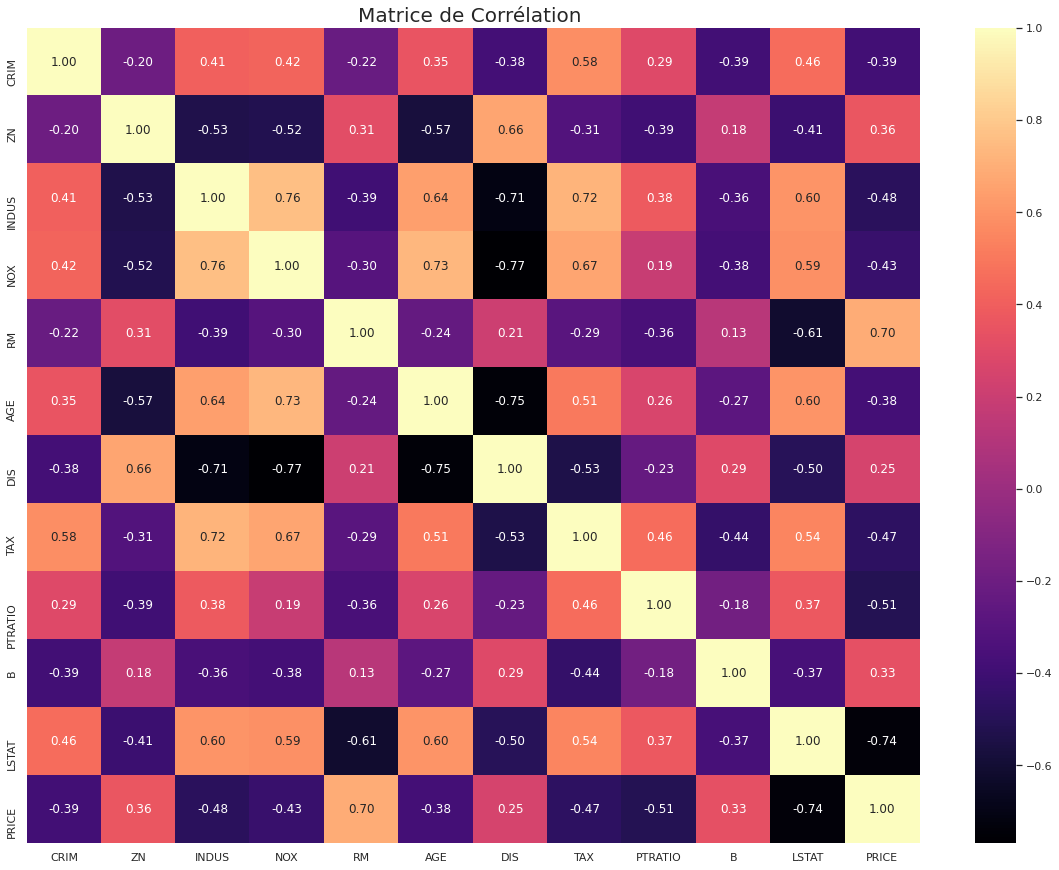

In [17]:
# Plotting the heatmap of correlation between all numeric features
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(data[nums_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Matrice de Corrélation ", fontsize=20)
plt.show()

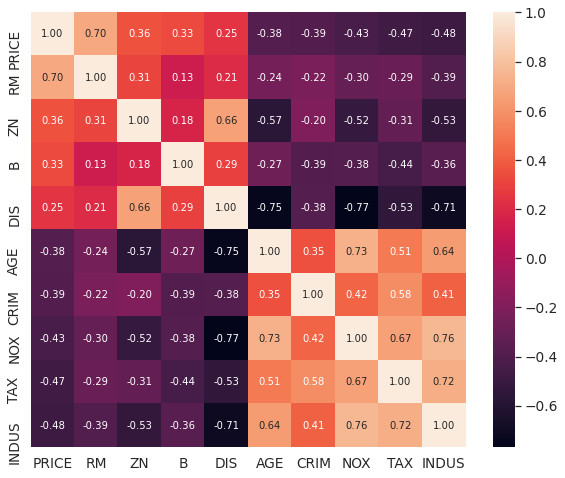

In [18]:
# Saleprice correlation matrix (Best 10 numeric correlation)
k = 10 #number of variables for heatmap
corrmat = data[nums_cols].corr()
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index #Return the first `n` rows with the largest values in `columns`
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [19]:
cat_cols

['CHAS', 'RAD']

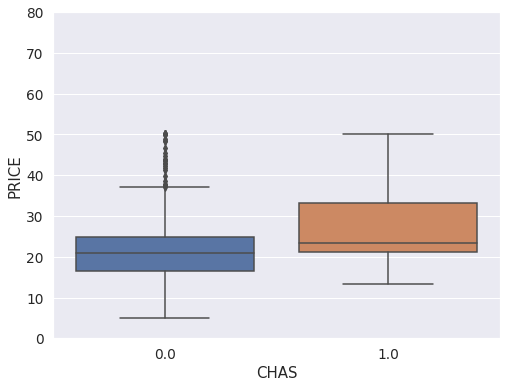

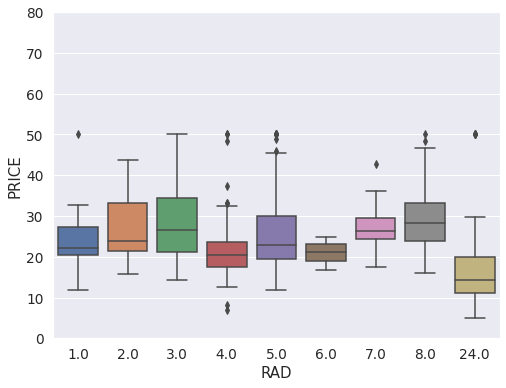

In [20]:
# Box plot catégorielles features / price
# In this part, we will try to detect outliers

for var in cat_cols:
    df = pd.concat([data['PRICE'], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="PRICE", data=df)
    fig.axis(ymin=0, ymax=80);

# Data preparation

In [21]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [22]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

## Finding out Feature importance

In [23]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestRegressor

In [24]:
# We perform training on the Random Forest model and generate the importance of the features
features_label = X.columns
forest = RandomForestRegressor(n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CRIM                           0.426353
 2) ZN                             0.377909
 3) INDUS                          0.066497
 4) CHAS                           0.038661
 5) NOX                            0.023256
 6) RM                             0.016687
 7) AGE                            0.014408
 8) DIS                            0.013247
 9) RAD                            0.011379
10) TAX                            0.005978
11) PTRATIO                        0.003674
12) B                              0.001044
13) LSTAT                          0.000906


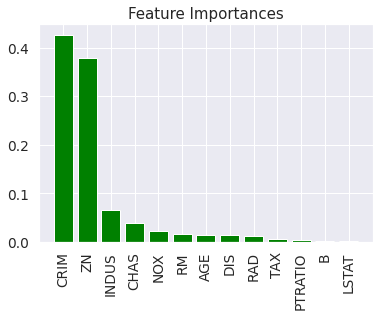

In [25]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

The graph above shows the features with the highest importance value to the lowest importance value. It shows the most important features are CRIM, ZN.

# Selecting Machine Learning Algorithms

Since we are modeling a critic problem for that we need model with high performance possible. Here, we will try a couple of different machine learning algorithms in order to get an idea about which machine learning algorithm performs better. Also, we will perform a accuracy comparison amoung them. 
As our problem is a regression problem, the algorithms that we are going to choose are as follows:
* Linear Regression (LR)
* Random Forest Regressor (RF)
* XGBoost Regressor (XGB)
* SVM Regressor (SVM)

## 1) Linear regression

#### Training the model

In [26]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
LR = LinearRegression()

# Train the model using the training sets 
LR.fit(X_train, y_train)

LinearRegression()

In [27]:
# Value of y intercept
LR.intercept_

36.35704137659506

In [28]:
# Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,LR.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.0556777
2,INDUS,-0.00883428
3,CHAS,4.69345
4,NOX,-14.4358
5,RM,3.28008
6,AGE,-0.00344778
7,DIS,-1.55214
8,RAD,0.32625
9,TAX,-0.0140666


#### Model Evaluation

In [29]:
# Model prediction on train data
y_pred = LR.predict(X_train)

In [30]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.0898610949711345
MSE: 19.07368870346903
RMSE: 4.367343437774162


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 






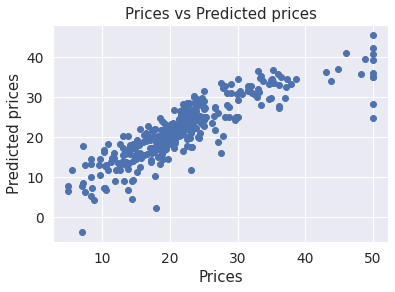

In [31]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

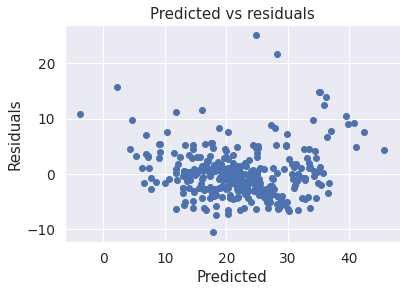

In [32]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

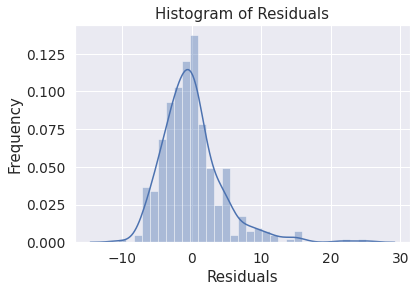

In [33]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

#### For test data

In [34]:
# Predicting Test data with the model
y_test_pred = LR.predict(X_test)

In [35]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409179
Adjusted R^2: 0.6850685326005697
MAE: 3.859005592370744
MSE: 30.05399330712429
RMSE: 5.482152251362989


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

## 2) Random Forest Regressor 

#### Train the model

In [36]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
RF = RandomForestRegressor()

# Train the model using the training sets 
RF.fit(X_train, y_train)

RandomForestRegressor()

#### Model Evaluation

In [37]:
# Model prediction on train data
y_pred = RF.predict(X_train)

In [38]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9786916203469072
Adjusted R^2: 0.9778768881837007
MAE: 0.8470254237288121
MSE: 1.6038994152542378
RMSE: 1.2664515052911571


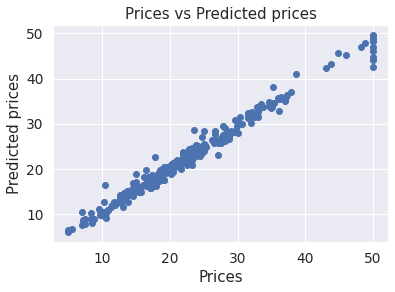

In [39]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

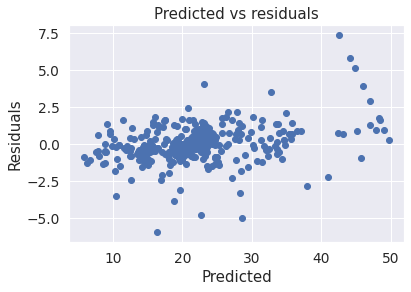

In [40]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

#### For test data

In [41]:
# Predicting Test data with the model
y_test_pred = RF.predict(X_test)

In [42]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8325304608641081
Adjusted R^2: 0.816754344858553
MAE: 2.5253026315789464
MSE: 17.487181381578935
RMSE: 4.181767734054455


## 3) XGBoost Regressor

#### Training the model

In [43]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

# Create a XGBoost Regressor
XGB = XGBRegressor()

# Train the model using the training sets 
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

n_estimators (int) – Number of boosted trees to fit.

gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.

subsample (float) – Subsample ratio of the training instance.

colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

nthread (int) – Number of parallel threads used to run xgboost. (Deprecated, please use n_jobs)

scale_pos_weight (float) – Balancing of positive and negative weights.


#### Model Evaluation

In [44]:
# Model prediction on train data
y_pred = XGB.predict(X_train)

In [45]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999980912169968
Adjusted R^2: 0.9999980182341173
MAE: 0.008653071775274813
MSE: 0.00014367568030020436
RMSE: 0.011986479061851497


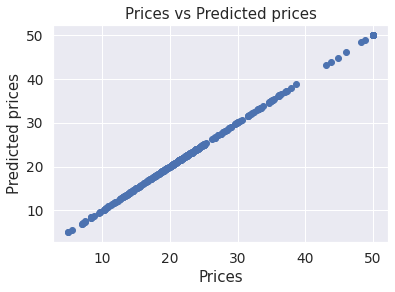

In [46]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

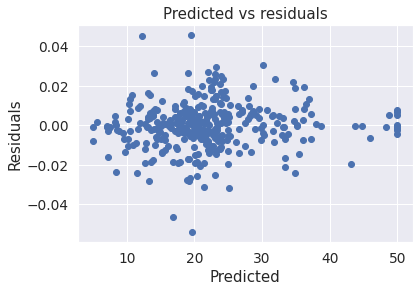

In [47]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

#### For test data

In [48]:
# Predicting Test data with the model
y_test_pred = XGB.predict(X_test)

In [49]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8579952058455785
Adjusted R^2: 0.8446179426281331
MAE: 2.5309582816927056
MSE: 14.828150869974769
RMSE: 3.8507338092855457


## 4) SVM Regressor

In [50]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the model

In [51]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
SVM = svm.SVR()

In [52]:
# Train the model using the training sets 
SVM.fit(X_train, y_train)

SVR()

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

#### Model Evaluation

In [53]:
# Model prediction on train data
y_pred = SVM.predict(X_train)

In [54]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6419097248941195
Adjusted R^2: 0.628218037904777
MAE: 2.9361501059460293
MSE: 26.953752101332935
RMSE: 5.191700309275655


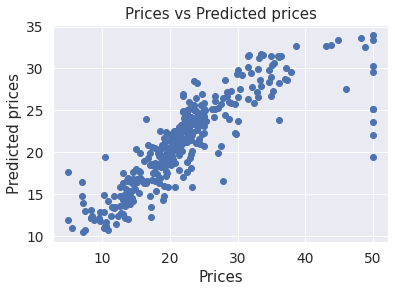

In [55]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

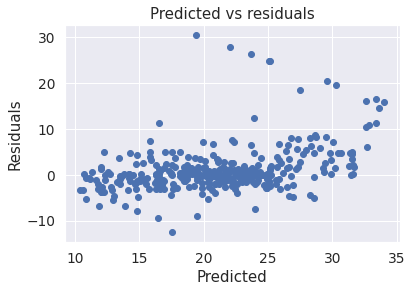

In [56]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [57]:
# Predicting Test data with the model
y_test_pred = SVM.predict(X_test)

In [58]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5900158460478174
Adjusted R^2: 0.5513941503856553
MAE: 3.7561453553021686
MSE: 42.81057499010247
RMSE: 6.542979060802691


## Evaluation and comparision of all the models

In [59]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,85.799521
1,Random Forest,83.253046
0,Linear Regression,71.218184
3,Support Vector Machines,59.001585


# Conclusion

In this project we build a model that predict the boston house price. After building several model, we have used the most efficient metric for model performance which is the R-squared Score.Form the obtained results, we notice that the XGBoost Regression and Random Forest models achieved the best score (about $83\%$).

In [60]:
# Create Pkl file based the best model (XGBoost model)
import pickle

# Saving model to disk
pickle.dump(XGB, open('model.pkl','wb'))